In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10,8)
pd.options.plotting.backend = "plotly"

#### Inferential Statistics
##### Shampoo dataset

In [4]:
data = pd.read_csv('./data/shampoo.csv')
data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [5]:
data.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [6]:
data.mean()

Sales    312.6
dtype: float64

#### Visualization

##### Histogram

In [7]:
fig = px.histogram(data, x='Sales',nbins=50, width=800, height=400, color_discrete_sequence=['#fcba03'],
                   title='Histogram of Shampoo Sales', labels= {'Sales': 'Shampoo Sales($M)'})
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
    yaxis_title="Frequency",
)

fig.show()

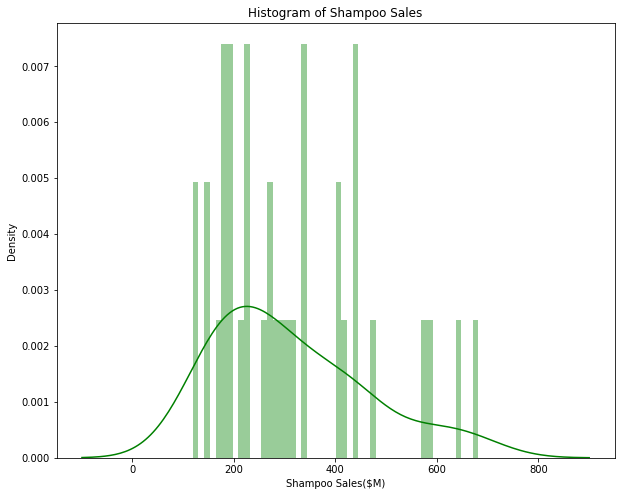

In [8]:
sns.distplot(x=data['Sales'], bins=50, hist=True, kde=True, color='green')
plt.title('Histogram of Shampoo Sales')
plt.xlabel('Shampoo Sales($M)')
plt.ylabel('Density')
plt.show()

#### Scatter Plot

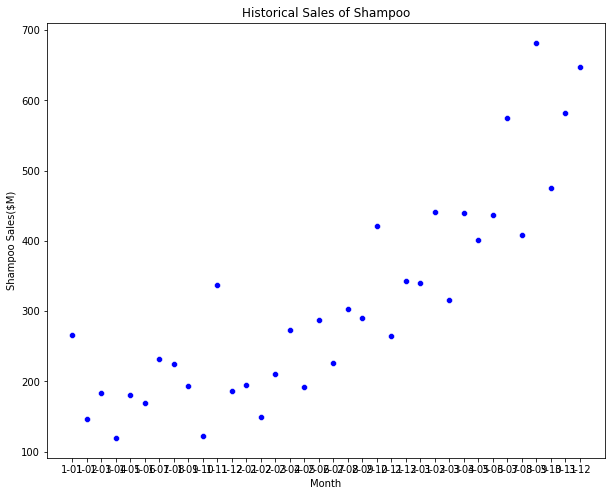

In [9]:
sns.scatterplot(x=data['Month'], y=data['Sales'], data=data, color='blue')
plt.title('Historical Sales of Shampoo')
plt.xlabel('Month')
plt.ylabel('Shampoo Sales($M)')
plt.show()

#### Inferential Statistics

In [10]:
co2_data = pd.read_csv('./data/co2_dataset.csv')
co2_data.head()

,year,data_mean_global,data_mean_nh,data_mean_sh
0,0,277.454,277.454,277.454
1,1,277.137,277.137,277.137
2,2,277.160,277.160,277.160
3,3,277.158,277.158,277.158
4,4,277.157,277.157,277.157


In [11]:
X = co2_data['year'].values[1950:]
y = co2_data['data_mean_global'].values[1950:]

fig = px.scatter(co2_data, x=X, y=y, width=800, height=400, color_discrete_sequence=['#fcba03'],
                 title='Historical Global CO2 Concentration in the Atmosphere ', labels= {'x': 'Year','y':'CO2 Concentration (ppm)'})
fig.show()

In [12]:
X = X.reshape(-1,1) 
y = y.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")

The slope is 1.3588711929434647 and the intercept is -2348.0338300545372


In [13]:
X = co2_data['year'].values[1950:]
y = co2_data['data_mean_global'].values[1950:]

predictions = reg.predict(X.reshape(-1,1))
x_range = X.reshape(-1,1) 

# fig = go.Figure()
fig = px.scatter(co2_data, x=X, y=y, width=800, height=400, color_discrete_sequence=['#fcba03'],
                 title='Historical CO2 Concentration', labels= {'x': 'Year','y':'CO2 Concentration (ppm)'})
# fig.add_trace(go.Scatter(name='X vs Y', x=X, y=y, mode='markers'))
# fig.add_trace(go.Scatter(x=x_range, y=predictions, name='Regression Fit',mode='lines'))

# plotly figure layout
fig.update_layout(xaxis_title = 'Year', yaxis_title = 'CO2 Concentration (ppm)')

fig.show()

In [14]:
X = sm.add_constant(co2_data['year'].values[1950:])

model = sm.OLS(co2_data['data_mean_global'].values[1950:], X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2073.
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           6.40e-50
Time:                        21:38:08   Log-Likelihood:                -189.19
No. Observations:                  65   AIC:                             382.4
Df Residuals:                      63   BIC:                             386.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2348.0338     59.161    -39.689      0.0

#### Observations
+ F stats is very high it means the model is good fit to the data
+ R2 is high so the model is good
+ p-value of the coefficient x1 is greater than the 0.05 which means the coefficient are relevant to the model and good fit


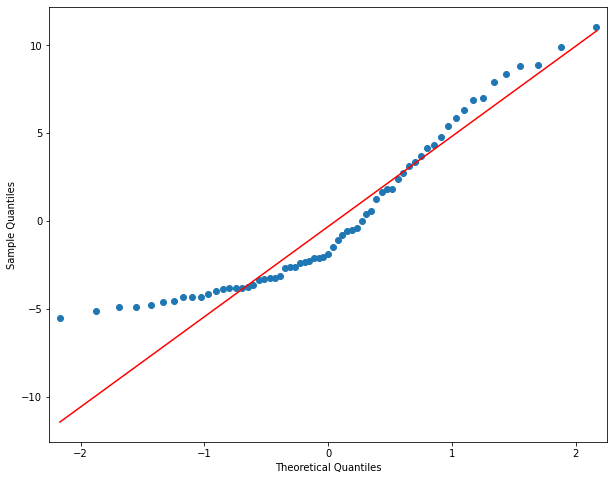

In [15]:
residuals = model.resid

qq_plot = sm.qqplot(residuals, line='q')
plt.show()

* The model is not the good fit as the residuals are not normally distributed and in the straight line of the QQ plot
* We will check this by further plotting the histogram of the residuals

In [16]:
fig = px.histogram(residuals, x=residuals,nbins=20, width=800, height=400, color_discrete_sequence=['#fcba03'],
                   title='Histogram of Residuals', labels= {'x': 'Residuals'})

fig.show()

#### Random Walk Model

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

##### Simulation of Random Walk

In [19]:
steps = np.random.standard_normal(1000)
steps[0] = 0

random_walk = np.cumsum(steps)

In [20]:
random_walk[:10]

array([ 0.        ,  0.60990816,  1.94837285,  0.55905834,  0.62317371,
        1.31274211,  0.78432122, -1.17748343, -1.32884462, -1.0321448 ])

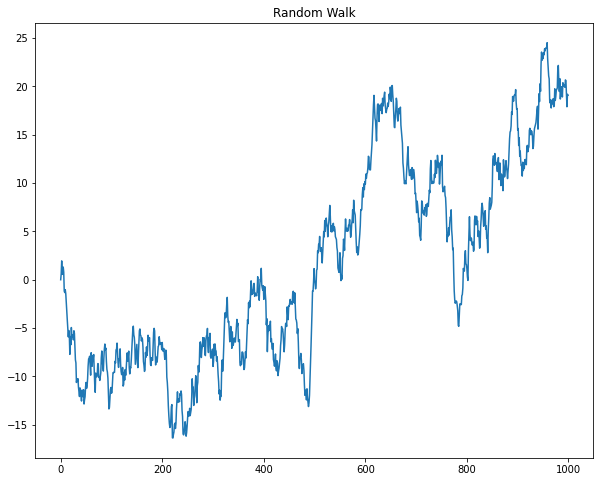

In [21]:
plt.plot(random_walk)
plt.title('Random Walk')
plt.show()

In [22]:
## ACF
random_walk_coef = acf(random_walk, nlags=20)
random_walk_coef

array([1.        , 0.9940768 , 0.9880452 , 0.9818443 , 0.97560516,
       0.9688911 , 0.96217899, 0.95550497, 0.94826997, 0.9413199 ,
       0.93451546, 0.92799323, 0.92114708, 0.91429039, 0.90725245,
       0.90049144, 0.89377914, 0.88698739, 0.88074156, 0.87450722,
       0.86813431])

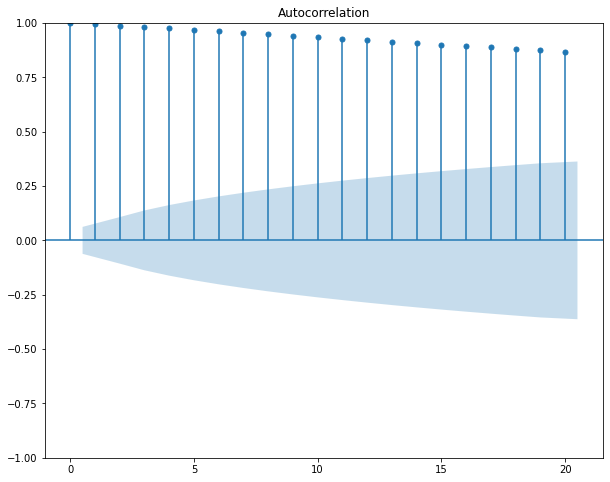

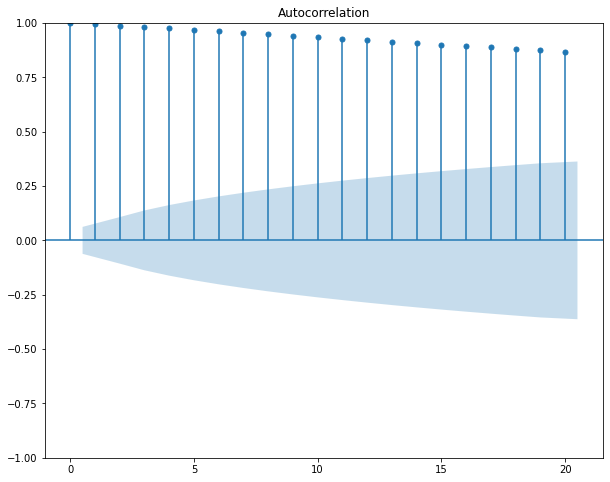

In [23]:
plot_acf(random_walk, lags=20)

In [24]:
# Take the difference from the previous time step for every data point
random_walk_diff = np.diff(random_walk, n=1)

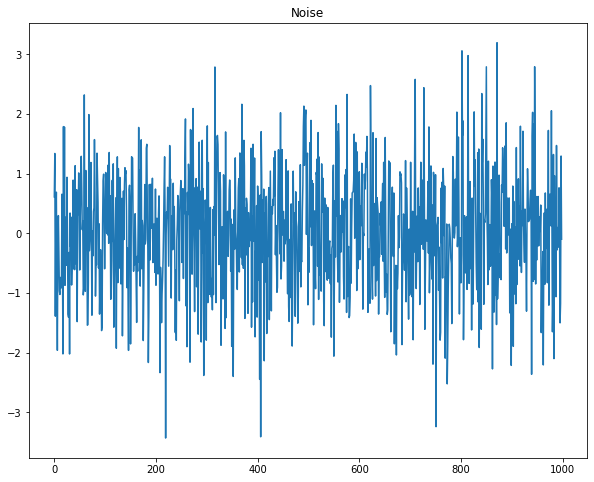

In [25]:
plt.plot(random_walk_diff)
plt.title("Noise")
plt.show()

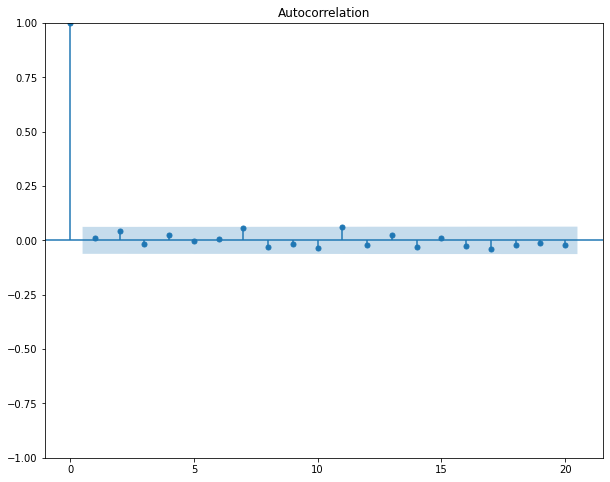

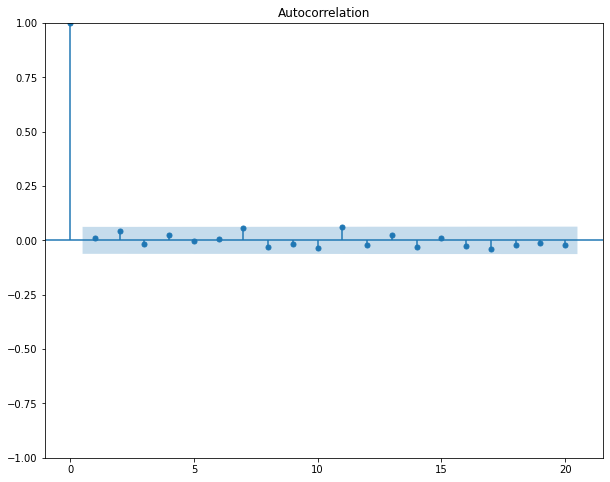

In [26]:
plot_acf(random_walk_diff, lags=20)

#### Moving Average Model

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

##### Stimulate the MA(2) process

$ y_t = 0.9Z_{t-1} + 0.3Z_{t-2} $<br>
Order is 2 here to stimulate it we need order 2 array 

In [28]:
# At lag 0 the coefficient of autocorrelation is 1, then 0.9, 0.3 simultaneously
ma2 = np.array([1, 0.9, 0.3])
# There is no auto regressive process here as it is 0
ar2 = np.array([1, 0, 0])

print(ma2)
print(ar2)

[1.  0.9 0.3]
[1 0 0]


In [29]:
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

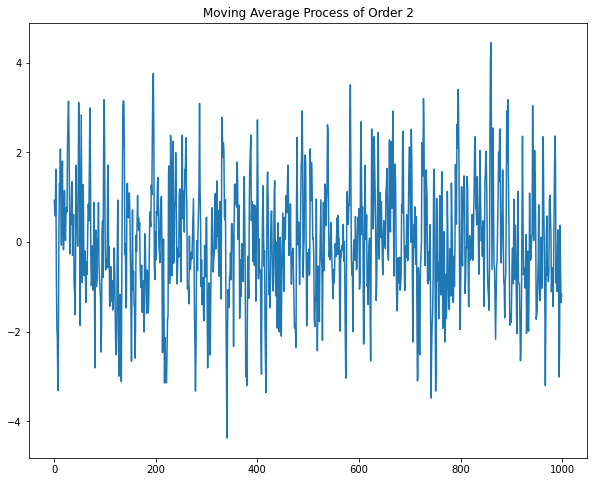

In [30]:
plt.plot(MA2_process)
plt.title("Moving Average Process of Order 2")
plt.show()

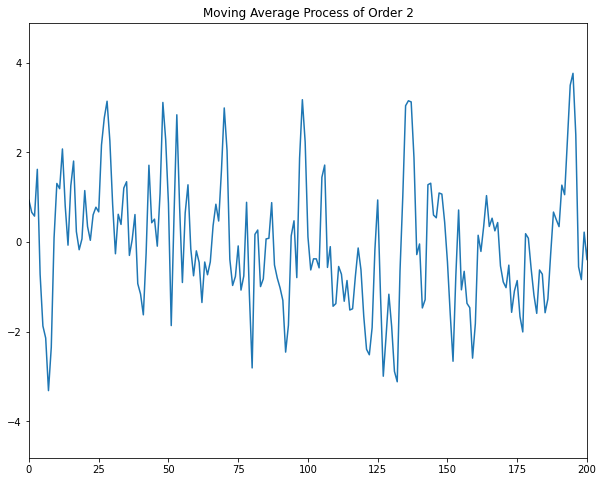

In [31]:
# Zooming in the plot
plt.plot(MA2_process)
plt.title("Moving Average Process of Order 2")
plt.xlim(0,200)
plt.show()

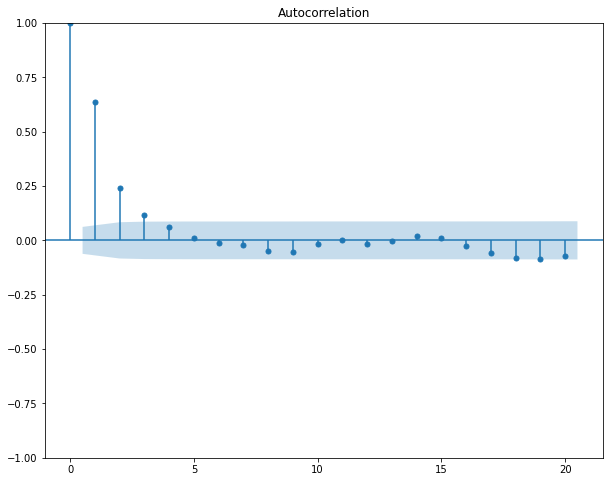

In [32]:
plot_acf(MA2_process, lags=20);

In [33]:
MA_model = ARIMA(MA2_process, order=(0,0,2), enforce_stationarity=False).fit()

print(MA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1388.578
Date:                Mon, 06 Jun 2022   AIC                           2785.155
Time:                        21:40:45   BIC                           2804.774
Sample:                             0   HQIC                          2792.613
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0393      0.066     -0.598      0.550      -0.168       0.090
ma.L1          0.8768      0.032     27.214      0.000       0.814       0.940
ma.L2          0.2408      0.031      7.679      0.0

#### Autoregressive Model

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller

##### Stimulate AR(2) Process
$ y_t = 0.33y_{t-1} + 0.5y_{t-2} $

In [35]:
ar2 = np.array([1, 0.33, 0.5])
# We just want auto regressive process here so we make it 0 for rest of the coefficients
ma2 = np.array([1, 0, 0])

In [36]:
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

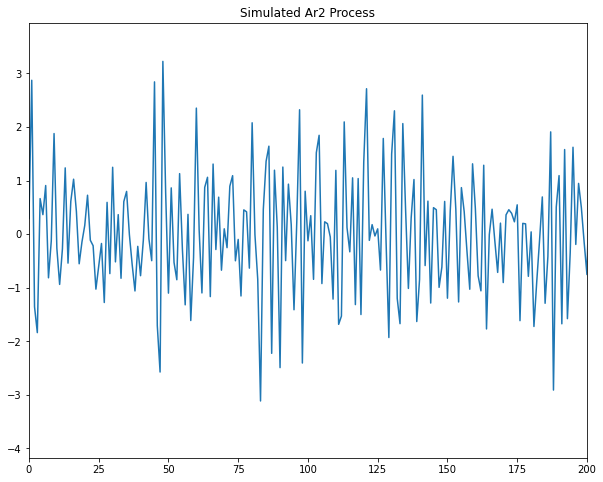

In [37]:
plt.plot(AR2_process)
plt.title("Simulated Ar2 Process")
plt.xlim(0,200)
plt.show()

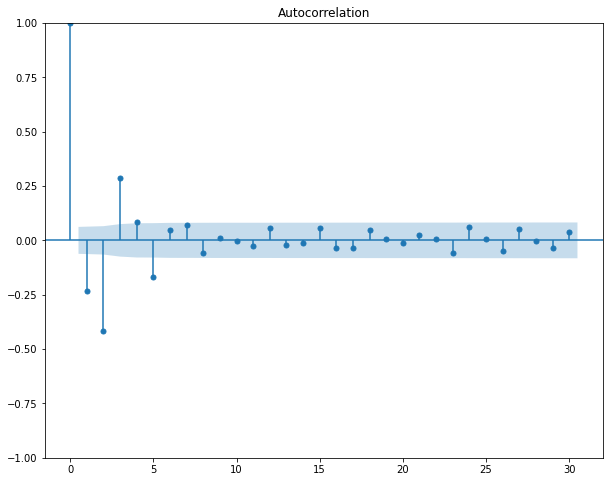

In [39]:
plot_acf(AR2_process);

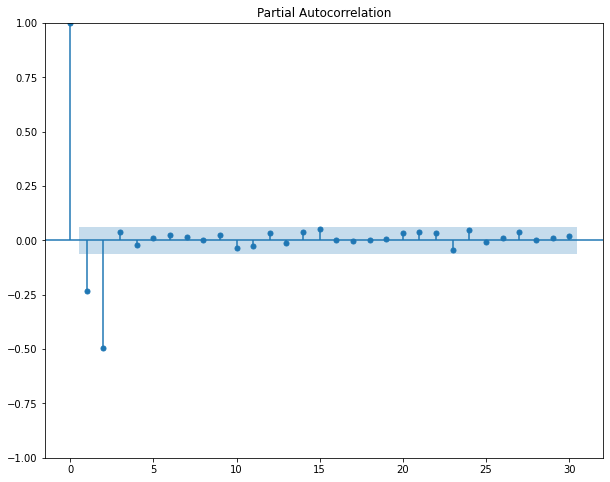

In [40]:
## PACF
plot_pacf(AR2_process);

In [42]:
rho, sigma = yule_walker(AR2_process, order=2, method='mle')
print(f"rho: {-rho}, sigma: {sigma}")

rho: [0.34597582 0.4960794 ], sigma: 1.018415978116902


##### Simulate AR(3) Process
$ y_t = 0.33y_{t-1} + 0.5y_{t-2} + 0.07$